# Interactive Data Visualization with folium

Authors: Prof. med. Thomas Ganslandt <Thomas.Ganslandt@medma.uni-heidelberg.de> <br>
and Kim Hee <HeeEun.Kim@medma.uni-heidelberg.de> <br>
Heinrich-Lanz-Center for Digital Health (HLZ) of the Medical Faculty Mannheim <br>
Heidelberg University

This tutorial is prepared for TMF summer school on 03.07.2019

## Case Study 1:  Dr. John Snow Cholera Outbreak (Geodata Visualization)
This case study is inspired by [here](https://rubygems.pkg.github.com/PHI-Case-Studies/1854-Cholera-Outbreak-London) <br>
This case study will recreate the approach that Dr. John Snow solved the cholera outbreak in London in 1854. <br>

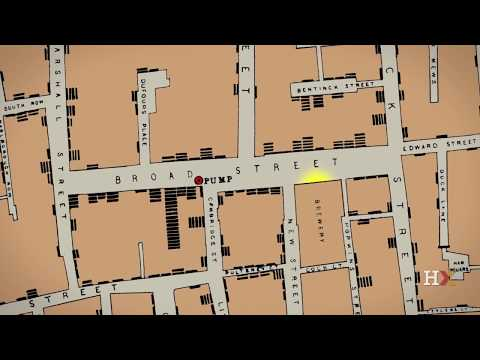

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('lNjrAXGRda4')

<img src="./images/John_Snow.png" alt="John Snow" style="float:left; padding-right:30px; height:400px; width:250px;"/>
<img src="./images/20040209cholera.jpg" style="float:right; padding-left:30px; height:400px; width:400px;"/>

Dr. John Snow was a physician from London in 1854 when a cholera outbreak occurred in the Soho district, in the West End of London. <b>There was widespread belief that "Miasma" or bad air and stench was the cause of the cholera outbreak in Soho district. However, Dr. Snow was skeptical of the Miasma theory and was certain that cholera was likely a water-borne illness.</b> In addition to his systematic process of determining how cholera is transmitted, he began to create maps of the Cholera deaths in Soho and to map the locations of water pumps within the neighborhood. 
<br><br>
<b> Original map by Dr. John Snow shown on the right </b> showing the clusters of cholera cases in the London epidemic of 1854, drawn and lithographed by Charles Cheffins.

### Import Folium (1/5)
https://python-visualization.github.io/folium/#<br>
`folium` is a Python web mapping package that can map data on a Leaflet map.

In [2]:
import folium
from folium import plugins
import pandas as pd

### Create a basemap of Soho District (2/5)
`Foluim` will plot the map object based on `OpenStreetMap (OSM)`. <br> `OSM` is a publicly available world map based on crowdsourced geographic information.

In [3]:
# the latitude and Longitude coordinates of the Soho District center
SOHO_COORDINATES = (51.513578, -0.136722)
map_soho = folium.Map(location = SOHO_COORDINATES, width = "100%", zoom_start = 15) # max zoom: 18
map_soho

Plot the map with Stamentoner themes that looks more similar to the original cholera map <br>
FYI, another popular theme is 'cartodbpositron'

In [4]:
folium.TileLayer('stamentoner').add_to(map_soho)
map_soho

###  Load and prepare the data (3/5)
The mortality data set has been collected by Dr. Snow from the Registrar's Office and from hospital records. 

In [5]:
df_pumps = pd.read_csv('resources/johnsnow_pumps.csv')
df_pumps.head(3)

,FID,LON,LAT
0,250,-0.136668,51.513341
1,251,-0.139586,51.513876
2,252,-0.139671,51.514906


In [6]:
df_deaths = pd.read_csv('resources/cholera_deaths.csv')
df_deaths.head(3)

,FID,DEATHS,LON,LAT
0,0,3,-0.137930,51.513418
1,1,2,-0.137883,51.513361
2,2,1,-0.137853,51.513317


Based on the given data set, three list objects need to be created. 
* `coordinates_p` stores all coordinates of pumps
* `coordinates_d` stores all coordinates of deaths
* `totaldeath` contains the number of deaths for each coordinate. This will determine the radius size of a marker

In [7]:
coordinates_p = df_pumps[["LAT","LON"]].values.tolist()
coordinates_d = df_deaths[["LAT","LON"]].values.tolist()
totaldeaths   = df_deaths[["DEATHS"]].values.tolist()
# Note that multiple functions can be chained together like above: .values.to_list()

###  Mapping the mortality data to the basemap (4/5)
Let us augument the basemap with mortality data set. Iterate the data set and map the `LAT` and `LON` values in `coordinates_d`. RegularPolygonMarker creates custom markers that draw red circles instead of points. The radius of the circle will be determined by the number of deaths in `totaldeaths`

In [8]:
for i in range(0, len(coordinates_d)):
    popup = folium.Popup(f'Location: [{round(coordinates_d[i][0],2)},{round(coordinates_d[i][1],2)}], Deaths: {totaldeaths[i][0]}')
    folium.RegularPolygonMarker(coordinates_d[i], radius = totaldeaths[i], \
                                stroke = False, fill_color = "red", fill_opacity = 0.5, number_of_sides = 12, \
                                popup = popup
                               ).add_to(map_soho) 
map_soho

###  Mapping the water pump data to the basemap (5/5)

In [9]:
for i in range(0, len(coordinates_p)):
    popup = folium.Popup(f'Pump: [{round(coordinates_p[i][0],2)},{round(coordinates_p[i][1],2)}]')
    folium.RegularPolygonMarker(coordinates_p[i], radius = 10, \
                                stroke = False, fill_color = "blue", fill_opacity = 1, \
                                popup = popup
                               ).add_to(map_soho)
map_soho

<img src="./images/John_Snow_memorial_and_pub.jpg"  style="float:left; padding-left:30px; padding-right:30px; height:300px; width:400px;"/>
The pump handle was removed on September 8, 1854 and remains as John Snow memorial on Broadwick Street, Soho. The public house named after Dr. John Snow is also seen behind the pump

# Question?
Authors: Prof. med. Thomas Ganslandt <Thomas.Ganslandt@medma.uni-heidelberg.de> <br>
and Kim Hee <HeeEun.Kim@medma.uni-heidelberg.de> <br>

Heinrich-Lanz-Center for Digital Health (HLZ) of the Medical Faculty Mannheim <br>
Heidelberg University

This is a part of a tutorial prepared for TMF summer school on 03.07.2019